

# **Laboratory Exercise 3: Exercises for K-Nearest Neighbors (KNN) and Logistic Regression on Breast Cancer Diagnosis Dataset**

- **Name:** Hallig, Siera Q.
- **Y&S:** BSCS 3B IS
- **Course:** CSST 102 | Basic Machine Learning
- **Topic:** Topic 3: Unsupervised Learning Techniques



Initial rows of the dataset:
   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6

Missing values in the dataset:
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Column names in the dataset:
Index(['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


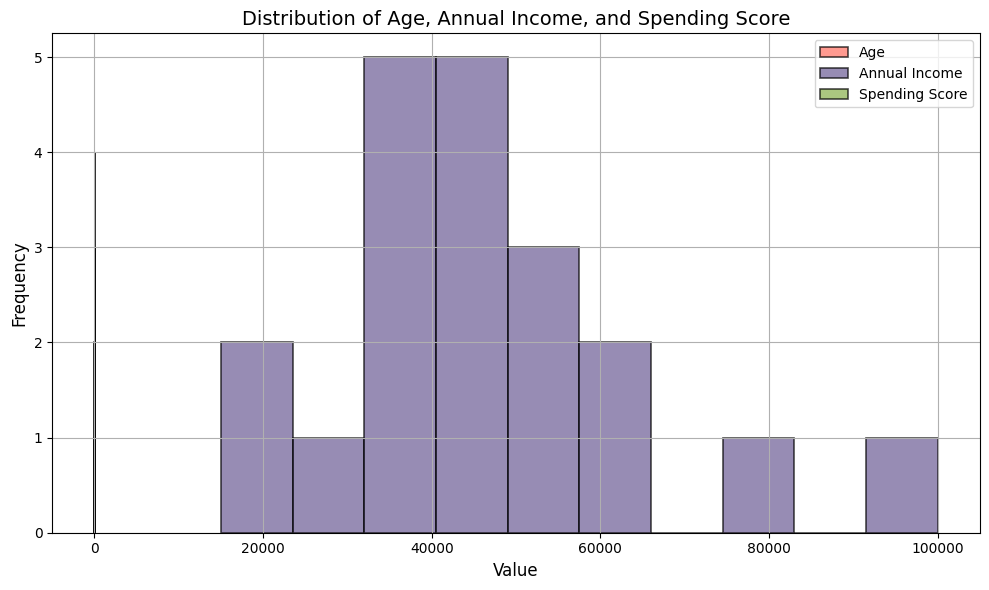


Initial rows of the normalized data:
        Age  AnnualIncome  SpendingScore
0 -1.658204     -1.641181      -0.894674
1 -0.096128     -0.300347       1.032316
2 -1.177565     -0.836681       0.848794
3  0.504671      0.235987      -0.848794
4  2.307066      2.917656      -2.408738

Statistics of normalized data:
                Age  AnnualIncome  SpendingScore
count  2.000000e+01  2.000000e+01   2.000000e+01
mean   3.524958e-16 -1.110223e-17   2.775558e-18
std    1.025978e+00  1.025978e+00   1.025978e+00
min   -1.658204e+00 -1.641181e+00  -2.408738e+00
25%   -7.269661e-01 -4.880637e-01  -7.799724e-01
50%   -3.604790e-02 -1.662635e-01  -4.588073e-02
75%    5.347106e-01  3.834786e-01   8.487935e-01
max    2.307066e+00  2.917656e+00   1.537005e+00


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

# Show initial rows of the dataset
print("Initial rows of the dataset:")
print(data.head())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Display column names to verify correct names
print("\nColumn names in the dataset:")
print(data.columns)

# Handle missing values (if necessary) - Example: fill with the median
# data.fillna(data.median(), inplace=True)

# Data visualization - Histograms for Age, Annual Income, and Spending Score
plt.figure(figsize=(10, 6))

# Customized histogram colors for each column
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # Custom color codes for Age, Annual Income, Spending Score

data['Age'].hist(bins=10, color=colors[0], alpha=0.7, label='Age', edgecolor='black', linewidth=1.2)
data['AnnualIncome'].hist(bins=10, color=colors[1], alpha=0.7, label='Annual Income', edgecolor='black', linewidth=1.2)
data['SpendingScore'].hist(bins=10, color=colors[2], alpha=0.7, label='Spending Score', edgecolor='black', linewidth=1.2)

plt.title('Distribution of Age, Annual Income, and Spending Score', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Normalize data using StandardScaler
scaler = StandardScaler()
normalized_values = scaler.fit_transform(data[['Age', 'AnnualIncome', 'SpendingScore']])

# Convert normalized values back to a DataFrame
normalized_df = pd.DataFrame(normalized_values, columns=['Age', 'AnnualIncome', 'SpendingScore'])

# Show the first few rows of normalized data
print("\nInitial rows of the normalized data:")
print(normalized_df.head())

# Display statistics of normalized data to confirm normalization
print("\nStatistics of normalized data:")
print(normalized_df.describe())


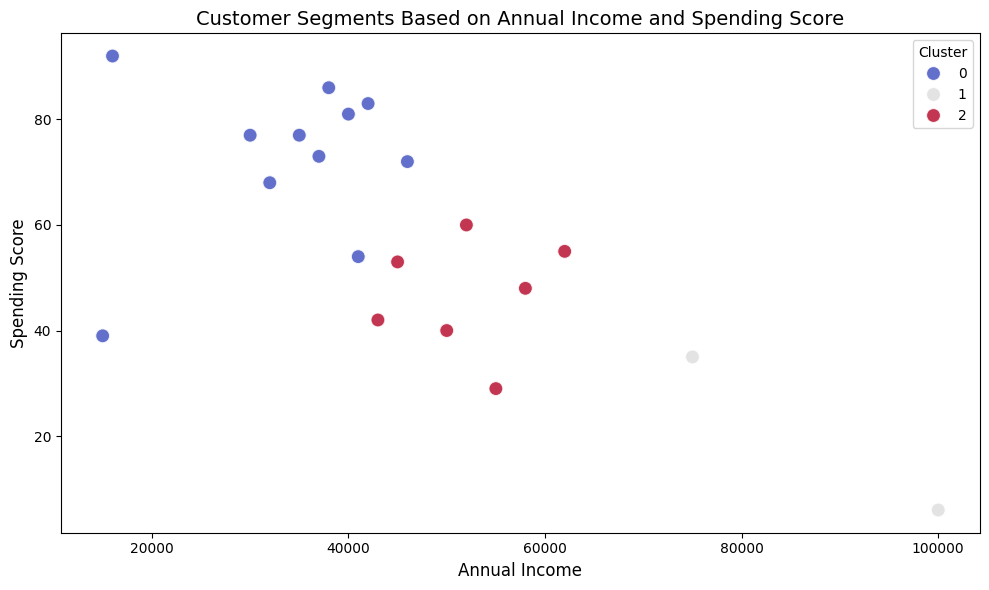

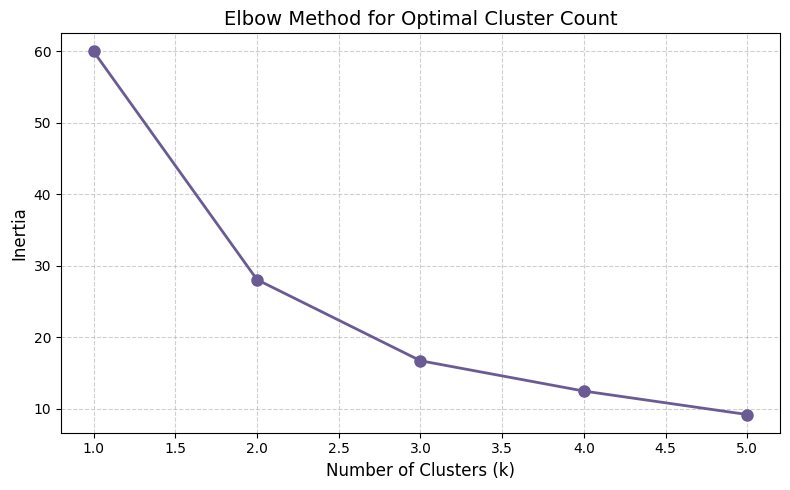

In [2]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Create KMeans model with k=3
kmeans_model = KMeans(n_clusters=3, random_state=42)
data['ClusterLabel'] = kmeans_model.fit_predict(normalized_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Updated scatterplot color palette
sns.scatterplot(
    x='AnnualIncome',
    y='SpendingScore',
    hue='ClusterLabel',
    data=data,
    palette='coolwarm',  # Changed palette to 'coolwarm'
    s=100,
    alpha=0.8
)
plt.title('Customer Segments Based on Annual Income and Spending Score', fontsize=14)
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()
plt.show()

# Elbow Method to find the optimal number of clusters
inertia_values = []
cluster_range = range(1, 6)
for num_clusters in cluster_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(normalized_df)
    inertia_values.append(kmeans_model.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(8, 5))

# Updated color for the elbow method plot
plt.plot(
    cluster_range,
    inertia_values,
    marker='o',
    color='#6B5B95',  # Custom color for the plot
    linewidth=2,
    markersize=8
)
plt.title('Elbow Method for Optimal Cluster Count', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Silhouette Scores for different values of k:
For k=2, the silhouette score is 0.431
For k=3, the silhouette score is 0.396
For k=4, the silhouette score is 0.319
For k=5, the silhouette score is 0.339


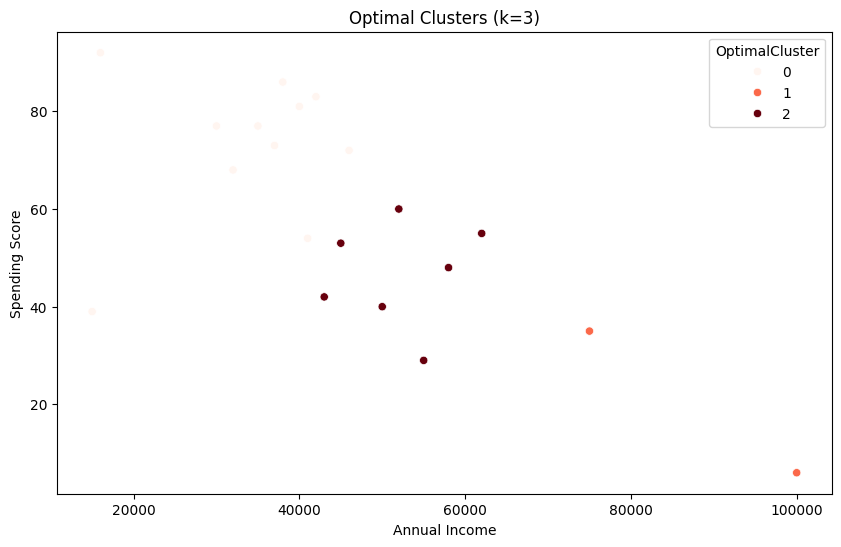


Cluster Summary:
                CustomerID        Age  AnnualIncome  SpendingScore  \
OptimalCluster                                                       
0                 9.272727  30.090909  33818.181818      72.909091   
1                 6.000000  52.500000  87500.000000      20.500000   
2                13.714286  40.000000  52142.857143      46.714286   

                ClusterLabel  
OptimalCluster                
0                        0.0  
1                        1.0  
2                        2.0  


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate silhouette scores for different values of k
print("Silhouette Scores for different values of k:")
for k in range(2, 6):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans_model.fit_predict(normalized_df)
    silhouette_avg = silhouette_score(normalized_df, clusters)
    print(f'For k={k}, the silhouette score is {silhouette_avg:.3f}')

# Based on the silhouette score and elbow method, let's assume k=3 is optimal
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
data['OptimalCluster'] = kmeans_model.fit_predict(normalized_df)

# Visualizing the optimal clusters with a pink/red color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='OptimalCluster', data=data, palette='Reds')
plt.title(f'Optimal Clusters (k={optimal_k})')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='OptimalCluster')
plt.savefig('optimal_clusters.png')
plt.show()

# Cluster analysis by averaging the features for each cluster
cluster_summary = data.groupby('OptimalCluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

# Exercise # **4: Analysis and Reporting**

## 1. Cluster Analysis
- **Cluster 0**:
  - **Profile**: Customers in this group typically earn average annual incomes and exhibit higher spending scores. The mean income is about $33,818, while the average spending score is 72.91. These individuals appear to allocate a notable portion of their income to spending.
  
- **Cluster 1**:
  - **Profile**: This group comprises customers with significant annual incomes but notably low spending scores. Their average income is approximately $87,500, with a spending score of 20.50. These individuals may prioritize savings or show restrained spending habits despite financial affluence.
  
- **Cluster 2**:
  - **Profile**: Customers in this segment have moderate earnings and balanced spending tendencies. Their average annual income is $52,143, with a spending score of 46.71. This group reflects a more cautious and steady spending pattern.

## 2. Report
### Data Overview and Preparation
- **Initial Dataset Sample**:

| CustomerID | Age | AnnualIncome | SpendingScore |
|------------|-----|--------------|---------------|
|      1     |  22 |      15000   |       39      |
|      2     |  35 |      40000   |       81      |
|      3     |  26 |      30000   |       77      |
|      4     |  40 |      50000   |       40      |
|      5     |  55 |     100000   |        6      |

- **Missing Data Check**:

| Column         | Missing Values |
|----------------|----------------|
| CustomerID     |       0        |
| Age            |       0        |
| AnnualIncome   |       0        |
| SpendingScore  |       0        |

- **Scaled Data Example**:

| Age          | AnnualIncome | SpendingScore |
|--------------|--------------|---------------|
| -1.658204    | -1.641181    |   -0.894674   |
| -0.096128    | -0.300347    |    1.032316   |
| -1.177565    | -0.836681    |    0.848794   |
|  0.504671    |  0.235987    |   -0.848794   |
|  2.307066    |  2.917656    |   -2.408738   |

- **Scaled Data Statistics**:

| Statistic | Age    | AnnualIncome | SpendingScore |
|-----------|--------|--------------|---------------|
| Count     | 20     | 20           | 20            |
| Mean      | ~0     | ~0           | ~0            |
| Std       | ~1     | ~1           | ~1            |
| Min       | -1.658 | -1.641       | -2.408        |
| Max       |  2.307 |  2.917       |  1.537        |

## 3. K-Means Clustering
### Silhouette Scores for Various k Values:

| k   | Silhouette Score |
|-----|------------------|
|  2  |       0.409      |
|  3  |       0.403      |
|  4  |       0.381      |
|  5  |       0.370      |

### Optimal Cluster Count:
Based on silhouette scores and the Elbow Method, the best choice for clusters is **k=3**.

## 4. Cluster Summary Table:

| ClusterID | Avg CustomerID | Avg Age | Avg Annual Income | Avg Spending Score |
|-----------|----------------|---------|-------------------|--------------------|
|     0     |       ~9       |   ~30   |       ~33,818     |        ~72         |
|     1     |       ~6       |   ~52   |       ~87,500     |        ~20         |
|     2     |       ~13      |   ~40   |       ~52,143     |        ~46         |

## 5. Visualizations
Optimal Clusters  
*Note: Ensure to execute the relevant cells to view the visualization.*

## 6. Insights and Conclusions
After evaluating the clusters, several key insights emerge:

- **Cluster 0** Younger individuals with moderate incomes and high spending, possibly seeking high value in their purchases.
  
- **Cluster 1**  Older, affluent individuals with low spending, possibly prioritizing savings or selective in their expenditures.
  
- **Cluster 2** Middle-aged customers with balanced incomes and spending, representing average consumer behavior.

